In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [17]:
df_train=pd.read_parquet('./data/fhv_tripdata_2021-01.parquet')

In [18]:
df_train.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037


# Question 1: Number of records in Jan 2021 FHV data


In [19]:
len(df_train)

1154112

In [21]:
df_train.dropOff_datetime=pd.to_datetime(df_train.dropOff_datetime)
df_train.pickup_datetime=pd.to_datetime(df_train.pickup_datetime)
df_train['duration']=df_train.dropOff_datetime-df_train.pickup_datetime
df_train.duration=df_train.duration.apply(lambda td: td.total_seconds()/60)

# Question 2: Average duration in Jan 2021 FHV

In [22]:
df_train.duration.mean()

19.1672240937939

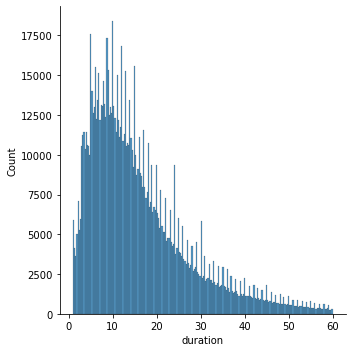

In [12]:
sns.displot(df_train, x="duration")

In [28]:
len(df_train[((df_train.duration<1)&(df_train.duration>60))])

0

## There are no outliers

In [29]:
df_train=df_train[((df_train.duration>=1)&(df_train.duration<=60))]

# Question 3: Fraction of missing values

In [31]:
df_train.isnull().sum()*100/len(df_train)

dispatching_base_num        0.000000
pickup_datetime             0.000000
dropOff_datetime            0.000000
PUlocationID               83.527328
DOlocationID               13.327044
SR_Flag                   100.000000
Affiliated_base_number      0.069651
duration                    0.000000
dtype: float64

In [32]:
df_train.PUlocationID=df_train.PUlocationID.fillna(-1)
df_train.DOlocationID=df_train.DOlocationID.fillna(-1)

In [35]:
df_train.isnull().sum()*100/len(df_train)

dispatching_base_num        0.000000
pickup_datetime             0.000000
dropOff_datetime            0.000000
PUlocationID                0.000000
DOlocationID                0.000000
SR_Flag                   100.000000
Affiliated_base_number      0.069651
duration                    0.000000
dtype: float64

# Question 4: Dimensionality after OHE

In [37]:
categorical=['PUlocationID','DOlocationID']

dv=DictVectorizer()

train_dicts=df_train[categorical].to_dict(orient='records')
X_train=dv.fit_transform(train_dicts)

In [47]:
X_train.shape

(1109826, 2)

# Question 5: RMSE on train

In [48]:
target='duration'
y_train=df_train[target].values

In [49]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_train)
mean_squared_error(y_train,y_pred,squared=False)

11.415432830521663

# Question 6: RMSE on validation

In [66]:
df_val=pd.read_parquet('./data/fhv_tripdata_2021-02.parquet')

In [67]:
df_val.dropOff_datetime=pd.to_datetime(df_val.dropOff_datetime)
df_val.pickup_datetime=pd.to_datetime(df_val.pickup_datetime)
df_val['duration']=df_val.dropOff_datetime-df_val.pickup_datetime
df_val.duration=df_val.duration.apply(lambda td: td.total_seconds()/60)

In [68]:
df_val=df_val[((df_val.duration>=1)&(df_val.duration<=60))]

In [69]:
df_val.PUlocationID=df_val.PUlocationID.fillna(-1)
df_val.DOlocationID=df_val.DOlocationID.fillna(-1)

In [70]:
categorical=['PUlocationID','DOlocationID']

dv=DictVectorizer()

val_dicts=df_val[categorical].to_dict(orient='records')
X_val=dv.fit_transform(val_dicts)

In [71]:
target='duration'
y_val=df_val[target].values

In [72]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_val)
mean_squared_error(y_val,y_pred,squared=False)

11.85822362355935